<a href="https://colab.research.google.com/github/Annie-Yeeun-Jang/Info_retrieval_project/blob/master/%5BSI650_project%5DMatrix_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/MyDrive/650/team_proj')

In [ ]:
!pip install --upgrade xlrd

In [ ]:
!pip install surprise

In [ ]:
jester=pd.read_excel('./data/FINAL jester 2006-15.xls', header=None)

In [ ]:
jester

In [ ]:
jester.isnull().sum().sum()

28

In [ ]:
import numpy as np

In [ ]:
jester=jester.replace(99.0, np.nan)

In [ ]:
jester.notnull().sum().sum()

1897190

In [ ]:
jester.notnull().sum()

0      54820
1          0
2          0
3          0
4          0
       ...  
146     5134
147    10218
148    16148
149    11524
150    19256
Length: 151, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
jester.notnull().sum()

0      54820
1          0
2          0
3          0
4          0
       ...  
146     5134
147    10218
148    16148
149    11524
150    19256
Length: 151, dtype: int64

Text(0.5, 1.0, 'Histogram of # each joke is rated')

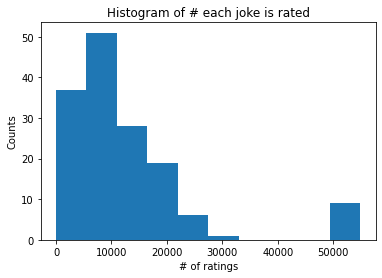

In [ ]:
plt.hist(jester.notnull().sum()) #num of ratings each joke recieved
plt.xlabel('# of ratings') #right skewed
plt.ylabel('Counts') 
plt.title('Histogram of # each joke is rated')

In [ ]:
df_processed=jester.drop(columns=[0])+30
df_processed

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,NaN,NaN,NaN,NaN,30.21875,NaN,20.71875,20.71875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,20.31250,NaN,39.93750,39.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,20.15625,NaN,20.15625,22.78125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,36.90625,NaN,34.75000,24.09375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,29.96875,NaN,20.90625,29.59375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,NaN,NaN,NaN,NaN,NaN,NaN,23.46875,27.65625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54901,NaN,NaN,NaN,NaN,NaN,NaN,38.93750,39.78125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54902,NaN,NaN,NaN,NaN,NaN,NaN,28.40625,34.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54903,NaN,NaN,NaN,NaN,NaN,NaN,22.59375,36.93750,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_processed.fillna(0, inplace=True)
df_processed #0: unrated, rating 20-40

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,0.0,0.0,0.0,0.0,30.21875,0.0,20.71875,20.71875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,20.31250,0.0,39.93750,39.53125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,20.15625,0.0,20.15625,22.78125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,36.90625,0.0,34.75000,24.09375,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,29.96875,0.0,20.90625,29.59375,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,0.0,0.0,0.0,0.0,0.00000,0.0,23.46875,27.65625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,0.0,0.0,0.0,0.0,0.00000,0.0,38.93750,39.78125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54902,0.0,0.0,0.0,0.0,0.00000,0.0,28.40625,34.53125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54903,0.0,0.0,0.0,0.0,0.00000,0.0,22.59375,36.93750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#reference code
'''
# MF
ply_pivot1 = ply_pivot1.pivot_table("link",index="id",columns="song_id")
ply_pivot1.fillna(0,inplace=True)
ply_pivot1

# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = ply_pivot1.values
# user_link_mean은 사용자의 평균 연결 
user_link_mean = np.mean(matrix, axis = 1)
# R_user_mean : 사용자-노래에 대해 사용자 평균 연결을 뺀 것.
matrix_user_mean = matrix - user_link_mean.reshape(-1, 1)
'''

'\n# MF\nply_pivot1 = ply_pivot1.pivot_table("link",index="id",columns="song_id")\nply_pivot1.fillna(0,inplace=True)\nply_pivot1\n\n# matrix는 pivot_table 값을 numpy matrix로 만든 것 \nmatrix = ply_pivot1.values\n# user_link_mean은 사용자의 평균 연결 \nuser_link_mean = np.mean(matrix, axis = 1)\n# R_user_mean : 사용자-노래에 대해 사용자 평균 연결을 뺀 것.\nmatrix_user_mean = matrix - user_link_mean.reshape(-1, 1)\n'

In [ ]:
import surprise

In [ ]:
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.
# https://seing.tistory.com/67
U, sigma, Vt = svds(df_processed, k = 6)
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(54905, 6)
(6,)
(6, 150)


In [ ]:
sigma = np.diag(sigma)
sigma

array([[ 4659.72916827,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,  4780.60385469,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,  5853.78499448,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,  7866.11251163,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
        14620.45187991,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        , 33298.93526555]])

In [ ]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다.
# 거기에 + 사용자 평균 rating을 적용한다.
svd_user_predicted_link = np.dot(np.dot(U, sigma), Vt) #+ user_link_mean.reshape(-1, 1)

In [ ]:
restored=pd.DataFrame(svd_user_predicted_link, columns=df_processed.columns)
restored

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,-5.621303e-16,-1.431471e-18,2.172711e-15,1.564589e-15,-0.061563,3.444703e-16,21.491919,22.954783,-5.464180e-16,5.678827e-16,...,0.808038,13.937860,21.635803,11.212838,19.353277,2.188978,12.005038,25.059045,17.270679,18.564294
1,-7.391970e-16,-1.462044e-18,2.076942e-15,2.040240e-15,0.213950,5.639126e-16,32.511836,33.984606,-6.539461e-16,6.274817e-16,...,-0.140972,6.691937,6.947350,4.413169,5.589077,0.278221,4.499228,12.594306,7.568637,11.572120
2,3.869112e-16,8.931903e-19,-1.046857e-15,-6.558897e-16,0.367451,-2.513665e-16,20.569600,21.270989,2.225463e-16,-2.196482e-16,...,2.172464,0.830057,1.878139,2.198559,1.315186,2.498591,1.465165,-0.595302,0.044715,-1.217906
3,-4.171327e-17,3.495508e-19,-8.123667e-16,5.784127e-16,0.777911,2.097236e-16,30.997035,32.239658,-1.440191e-16,1.218932e-16,...,12.580915,15.572949,11.139889,17.959691,11.166403,15.384678,18.360061,17.636160,17.887743,20.245297
4,-1.820123e-16,-3.411677e-19,6.937694e-16,7.847727e-16,0.207491,1.704702e-16,26.325158,27.460811,-2.168089e-16,2.176403e-16,...,-0.534457,4.474365,4.267207,2.443344,3.218539,-0.315018,2.150462,7.489605,4.227100,2.653657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,6.808836e-16,1.209547e-18,-1.089165e-15,-1.441091e-15,0.255771,-6.185643e-16,24.118398,25.101039,3.988116e-16,-3.640832e-16,...,-0.331245,-1.266125,9.749301,1.659620,7.671794,-0.257924,0.541249,0.440366,-0.884006,-1.566555
54901,8.110740e-17,3.546695e-19,-3.018547e-16,2.145005e-16,0.510115,1.371876e-17,37.459574,38.768393,-4.070652e-17,1.515625e-17,...,0.809217,0.110303,-1.133300,-0.031248,-1.960042,0.731013,-1.122497,-1.936431,-2.166097,-1.769229
54902,-6.062737e-16,-1.181782e-18,2.198679e-15,1.346369e-15,0.193563,2.196976e-16,28.093879,29.126403,-5.136475e-16,5.319970e-16,...,-2.875090,-3.134864,6.626129,2.396519,4.165215,-3.045810,2.238721,11.105435,4.270249,14.825221
54903,4.790133e-17,2.301563e-19,-1.925419e-16,1.873730e-16,0.367198,2.177448e-17,27.403017,28.371135,-3.944245e-17,1.942293e-17,...,0.581365,0.270336,-0.738202,-0.035343,-1.333574,0.526020,-0.823494,-1.376155,-1.543955,-1.303465


In [ ]:
df_processed

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,0.0,0.0,0.0,0.0,30.21875,0.0,20.71875,20.71875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,20.31250,0.0,39.93750,39.53125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,20.15625,0.0,20.15625,22.78125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,36.90625,0.0,34.75000,24.09375,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,29.96875,0.0,20.90625,29.59375,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54900,0.0,0.0,0.0,0.0,0.00000,0.0,23.46875,27.65625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,0.0,0.0,0.0,0.0,0.00000,0.0,38.93750,39.78125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54902,0.0,0.0,0.0,0.0,0.00000,0.0,28.40625,34.53125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54903,0.0,0.0,0.0,0.0,0.00000,0.0,22.59375,36.93750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Evaluation

In [ ]:
from sklearn.metrics import ndcg_score

In [ ]:
user_id=0
ndcg_score(np.asarray([df_processed.loc[user_id]]), np.asarray([restored.loc[user_id]]))

0.8876414707651327

In [ ]:
arr=np.array([4,5,1,3])
arr.argsort()[::-1].argsort()+1

array([2, 1, 4, 3])

In [ ]:
def get_rank(arr):
  return arr.argsort()[::-1].argsort()+1

In [ ]:
gt_rank=get_rank(df_processed.loc[user_id])
pred_rank=get_rank(restored.loc[user_id])

In [ ]:
np.asarray([gt_rank])

array([[150,  72,  73,  74,  35,  75,  60,  61,  76,  77,  78,  79,  50,
         80,  32,  62,  58,  52,  56,  59,  51,  57,  55,  54,  53,  43,
         10,  81,  11,  82,  13,  14,  84,  48,  16,  17,  85,  86,  87,
         88,  89,  39,  90,  71,  70,  67,  66,  63,  40,   1,  41,  37,
         12,  24,  68,  65,  64,  91,  83,  93,  42,  34, 108, 125,  18,
         22, 126,  46,  21, 127, 128,  15, 129, 130,  92,   5, 132, 133,
        134,  38,  36, 135,   6, 136, 137, 138,  25, 139,   2, 140,  19,
         27,   4, 141, 142, 143, 144, 145, 146, 147, 148,  33,  49,  29,
         31,  47,  30,  26,   3, 149, 124, 123, 122, 121,  95,  96,  97,
         44,   8,   7,  20,  98,   9,  99, 100, 101,  23,  45, 102, 103,
        104, 105, 106,  28,  94, 107, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 131,  69]])

In [ ]:
ndcg_score(np.asarray([gt_rank]), np.asarray([pred_rank]), k=10)

0.5190368261143826

In [ ]:
ndcg_cum=0
for user_id in range(len(df_processed)):
  gt_rank=get_rank(df_processed.loc[user_id])
  pred_rank=get_rank(restored.loc[user_id])
  ndcg_cum+=ndcg_score(np.asarray([gt_rank]), np.asarray([pred_rank]), k=10)

In [ ]:
ndcg_total=ndcg_cum/len(df_processed)
ndcg_total #for k=5

0.605376949965302

In [ ]:
ndcg_total=ndcg_cum/len(df_processed)
ndcg_total #for k=10

0.6078611202443114

In [ ]:
hit=0
k=10
for user_id in range(len(df_processed)):
  top_k_pred=list(restored.loc[user_id].sort_values(ascending=False).index[:k])
  top_true=df_processed.loc[user_id].sort_values(ascending=False).index[0]
  if top_true in top_k_pred:
    hit+=1

In [ ]:
hit_ratio=hit/len(df_processed)
hit_ratio #for k=5

0.30601948820690283

In [ ]:
hit_ratio=hit/len(df_processed)
hit_ratio #for k=10

0.5148893543393134

## Naive approach evaluation

In [ ]:
naive_pred=df_processed.mean()
naive_pred

1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.288287
         ...    
146     2.824381
147     5.914830
148     9.696221
149     6.799298
150    11.493085
Length: 150, dtype: float64

In [ ]:
#ndcg
ndcg_cum=0
naive_rank=get_rank(naive_pred)
for user_id in range(len(df_processed)):
  gt_rank=get_rank(df_processed.loc[user_id])
  ndcg_cum+=ndcg_score(np.asarray([gt_rank]), np.asarray([naive_rank]), k=10)

In [ ]:
ndcg_total=ndcg_cum/len(df_processed)
ndcg_total #for k=5

0.6135019662129706

In [ ]:
ndcg_total=ndcg_cum/len(df_processed)
ndcg_total #for k=10

0.5629028558834749

In [ ]:
#hit ratio
hit=0
k=10
naive_top_k_pred=list(naive_pred.sort_values(ascending=False).index[:k])
for user_id in range(len(df_processed)):
  top_true=df_processed.loc[user_id].sort_values(ascending=False).index[0]
  if top_true in naive_top_k_pred:
    hit+=1

In [ ]:
hit_ratio=hit/len(df_processed)
hit_ratio #for k=5

0.260304161733904

In [ ]:
hit_ratio=hit/len(df_processed)
hit_ratio #for k=10

0.44050632911392407

## Below here is just for reference
- Codes we can refer for more advanced models:
- https://github.com/microsoft/recommenders
- https://github.com/microsoft/recommenders/blob/main/examples/02_model_collaborative_filtering/lightgcn_deep_dive.ipynb
- https://github.com/microsoft/recommenders/blob/main/examples/02_model_collaborative_filtering/standard_vae_deep_dive.ipynb


In [ ]:
df_svd_preds = pd.DataFrame(svd_user_predicted_link,index= ply_pivot1.index ,columns = ply_pivot1.columns)
df_svd_preds

In [ ]:
#우리가 캡스톤에 사용했던 방식은 결국 leave one out인거암. 
def recommend_songs(df_svd_preds, user_id, ori_link_df, num_recommendations):
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 곡 데이터 정렬 -> 영화 유사도가 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.loc[user_id].sort_values(ascending=False)
    # 원본 곡 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    #user_data = ori_link_df.loc[user_id]
    # 사용자의 곡 유사도가 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = pd.DataFrame(sorted_user_predictions).reset_index()
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_id: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
    return recommendations

In [ ]:
predictions = recommend_songs(df_svd_preds, 23431, ply_pivot1, 100)

In [ ]:
predictions

In [ ]:
import json
 
# Ready for data
songs = []
song = {}
for name in ply_pivot_val.id:
  song['id'] = name
  song['songs'] = list(recommend_songs(df_svd_preds, name, ply_pivot1, 100)['song_id'])
  songs.append(song)

 
# Print JSON
print(json.dumps(songs, indent="\t") )

In [ ]:
# Write JSON
with open('./답안/res.json', 'w', encoding="utf-8") as make_file:
    json.dump(songs, make_file, ensure_ascii=False, indent="\t")

In [ ]:
f = open('./답안/res.json', encoding="UTF-8")
raw_data = json.loads(f.read())
raw_data